In [1]:
import pandas as pd
from skgstat import Variogram, DirectionalVariogram
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ert = pd.read_csv('../data/ert_inv.csv')

In [3]:
def prepare_ert_data(ert, doi=100, xstart=0, nsamples=1000):
    d = np.unique(ert['d'])
    topo = np.zeros(d.shape[0])
    for i in range(d.shape[0]):
        topo[i] = np.max(ert['z'][ert['d']==d[i]])

    bad_inds = [13, 67, 671, 677, 702]
    d = np.delete(d, bad_inds)
    topo = np.delete(topo, bad_inds)
    
    zmax = np.interp(ert['d'],d,topo)
    dep = zmax - ert['z']

    above_doi = dep < doi
    outside_frac = ert['d'] > xstart
    
    inds_filt = above_doi & outside_frac
    rs = np.random.choice(sum(inds_filt), size=nsamples, replace=False)
    
    res = ert['res'][inds_filt].values[rs]
    coords = ert[{'d','z'}][inds_filt].values[rs]
    print('Number of Points: '+str(sum(inds_filt)))
    
    return coords, res


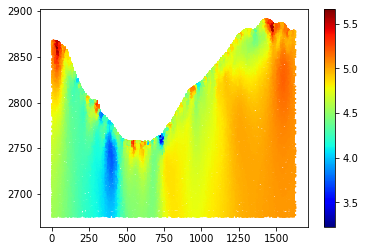

In [4]:
plt.scatter(ert['d'],ert['z'],1,np.log(ert['res']),cmap='jet') 
plt.colorbar()

In [5]:
coords, res = prepare_ert_data(ert, doi=75, nsamples=10000)
# Vh = DirectionalVariogram(coords, res, n_lags=25, nugget=True, azimuth=0, tolerance=5)
# Vv = DirectionalVariogram(coords, res, n_lags=10, nugget=True, azimuth=90, tolerance=10)

Number of Points: 140197


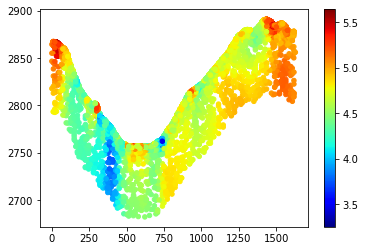

In [6]:
plt.scatter(coords[:,0], coords[:,1], 20, np.log(res), cmap='jet')
plt.colorbar()

/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:371: RuntimeWarning: invalid value encountered in true_divide
  pos_angles = np.arccos(scalar / self._euclidean_dist)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:670: RuntimeWarning: invalid value encountered in greater
  absdiff = np.where(absdiff > np.pi, absdiff - np.pi, absdiff)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:671: RuntimeWarning: invalid value encountered in greater
  absdiff = np.where(absdiff > np.pi / 2, np.pi - absdiff, absdiff)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:673: RuntimeWarning: invalid value encountered in less_equal
  in_tol = absdiff <= np.radians(self.tolerance / 2)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:674: RuntimeWarning: invalid value encountered in less_

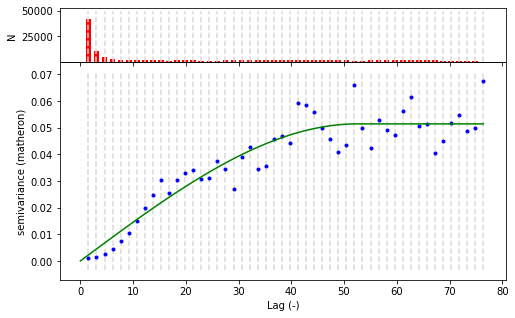

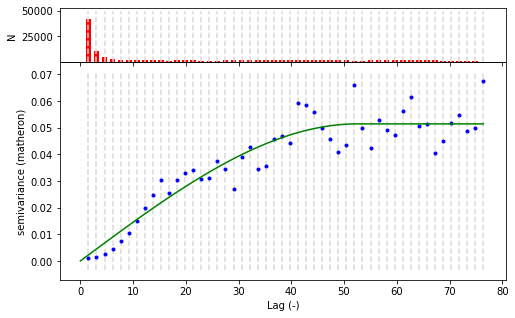

In [7]:
Vh = DirectionalVariogram(coords, np.log(res), n_lags=50, use_nugget=False, azimuth=90, tolerance=5, bandwidth=25, maxlag=500)
Vh.plot()

/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:371: RuntimeWarning: invalid value encountered in true_divide
  pos_angles = np.arccos(scalar / self._euclidean_dist)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:670: RuntimeWarning: invalid value encountered in greater
  absdiff = np.where(absdiff > np.pi, absdiff - np.pi, absdiff)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:671: RuntimeWarning: invalid value encountered in greater
  absdiff = np.where(absdiff > np.pi / 2, np.pi - absdiff, absdiff)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:673: RuntimeWarning: invalid value encountered in less_equal
  in_tol = absdiff <= np.radians(self.tolerance / 2)
/home/ammilten/anaconda3/envs/pg/lib/python3.7/site-packages/skgstat/DirectionalVariogram.py:674: RuntimeWarning: invalid value encountered in less_

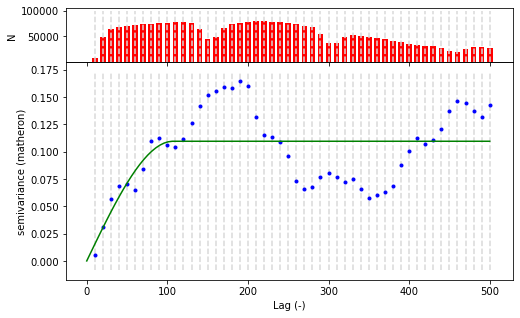

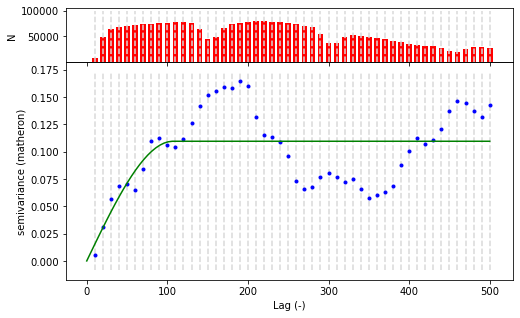

In [8]:
Vv = DirectionalVariogram(coords, np.log(res), n_lags=50, use_nugget=False, azimuth=0, tolerance=5, bandwidth=25,maxlag=500)
Vv.plot()

In [9]:
np.sqrt(700)

26.457513110645905